In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [12]:
names = {'Esmo': 'Speaker 1', 'Liam': 'Speaker 2', 'Bonnie': 'Speaker 3', 'Dani': 'Speaker 4', 'Paul': 'Speaker 5',
        'Beve': 'Speaker 6', 'Hazel': 'Speaker 7', 'Irene': 'Speaker 8', 'Ella': 'Speaker 9', 'Jack': 'Speaker 10',
        'Sophie': 'Speaker 11', 'Brian': 'Speaker 12', 'Adam': 'Speaker 13'}

counts = {}

In [13]:
videos_path = os.path.join('..', 'videos')

for path, _, files in os.walk(videos_path):
    illegal = ['.DS_Store', 'liam_01_n.mp4', 'esmo_read_01.mp4', 'esmo_read_02.mp4', 'hazel_read_01.mp4', 'hazel_read_02.mp4']
    for file in illegal:
        if file in files:
            files.remove(file)
    if len(files) == 0:
        continue
    speaker = path.split('/')[-1]
    n = sum(['_n' in file for file in files])
    e = sum(['_e' in file for file in files])
    i = sum(['_i' in file for file in files])
    counts[names[speaker]] = {'n': n, 'e': e, 'i': i}

In [17]:
speakers = ['Speaker {}'.format(i) for i in range(1, 14)]
n = [counts[speaker]['n'] for speaker in speakers]
e = [counts[speaker]['e'] for speaker in speakers]
i = [counts[speaker]['i'] for speaker in speakers]

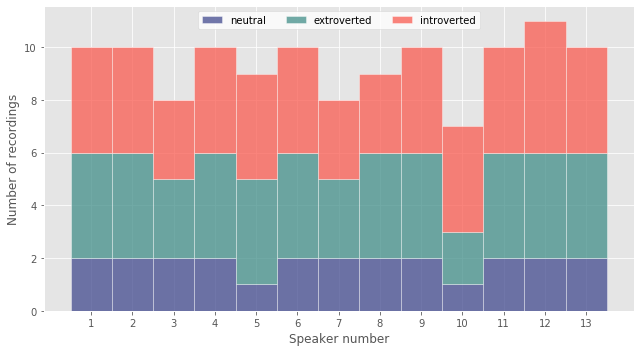

In [98]:
plt.figure(figsize=(9, 5))
plt.style.use('ggplot')

width = 1
plt.bar(r, n, color='#424A8F', edgecolor='white', width=width, label='neutral', alpha=0.75)
plt.bar(r, e, bottom=n, color='#428F89', edgecolor='white', width=width, label='extroverted', alpha=0.75)
plt.bar(r, i, bottom=np.add(n, e), color='#FA5C51', edgecolor='white', width=width, label='introverted', alpha=0.75)
 
# Custom X axis
plt.xticks(range(13), range(1, 14))
plt.xlabel('Speaker number')
plt.ylabel('Number of recordings')
plt.legend(loc='upper center', ncol=3, facecolor='white')
 
# Show graphic
plt.tight_layout()
plt.savefig('recording-counts.pdf')
plt.show()